### Upload Dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d sunilthite/cat-or-dog-image-classification

Dataset URL: https://www.kaggle.com/datasets/sunilthite/cat-or-dog-image-classification
License(s): other
 94% 566M/599M [00:01<00:00, 327MB/s]
100% 599M/599M [00:01<00:00, 408MB/s]


In [ ]:
!unzip cat-or-dog-image-classification.zip

### Importing Libraries

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

### Prepare the Data for training

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256),
    shuffle = True,
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256),
    shuffle = True,
)

Found 23650 files belonging to 2 classes.
Found 3863 files belonging to 2 classes.


### Normalize the Data

In [7]:
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  label = tf.cast(label, tf.float32)
  return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

Label: 1.0
Shape: (256, 256, 3)


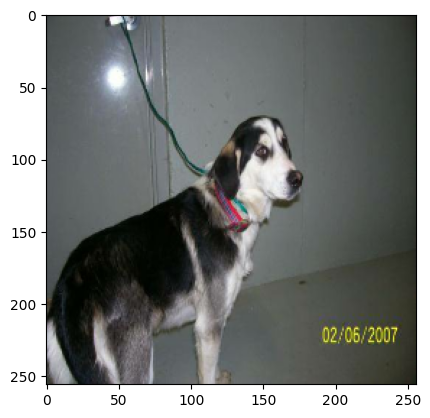

In [8]:
for image,label in train_ds.take(1):
  plt.imshow(image[0].numpy())
  print("Label:", label[0].numpy())
  print('Shape:', image[0].shape)

### Prepare the Neural Network

In [9]:
model = Sequential()
model.add(Input(shape=(256, 256, 3)))
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

### Train the model

In [12]:
history = model.fit(train_ds, epochs=20, validation_data=test_ds)

Epoch 1/20
740/740 ━━━━━━━━━━━━━━━━━━━━ 84s 96ms/step - accuracy: 0.5361 - loss: 4.1737 - val_accuracy: 0.6464 - val_loss: 1.4694
Epoch 2/20
740/740 ━━━━━━━━━━━━━━━━━━━━ 65s 87ms/step - accuracy: 0.6285 - loss: 1.3043 - val_accuracy: 0.7479 - val_loss: 0.8924
Epoch 3/20
740/740 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.7173 - loss: 0.9156 - val_accuracy: 0.7334 - val_loss: 0.9158
Epoch 4/20
740/740 ━━━━━━━━━━━━━━━━━━━━ 65s 88ms/step - accuracy: 0.7615 - loss: 0.8724 - val_accuracy: 0.7994 - val_loss: 0.7738
Epoch 5/20
740/740 ━━━━━━━━━━━━━━━━━━━━ 64s 86ms/step - accuracy: 0.7904 - loss: 0.8924 - val_accuracy: 0.7888 - val_loss: 0.9784
Epoch 6/20
740/740 ━━━━━━━━━━━━━━━━━━━━ 63s 86ms/step - accuracy: 0.8163 - loss: 0.8912 - val_accuracy: 0.5488 - val_loss: 1.3685
Epoch 7/20
740/740 ━━━━━━━━━━━━━━━━━━━━ 88s 94ms/step - accuracy: 0.8335 - loss: 1.0624 - val_accuracy: 0.7882 - val_loss: 1.0378
Epoch 8/20
740/740 ━━━━━━━━━━━━━━━━━━━━ 63s 86ms/step - accuracy: 0.8468 - loss: 0.9941 - 

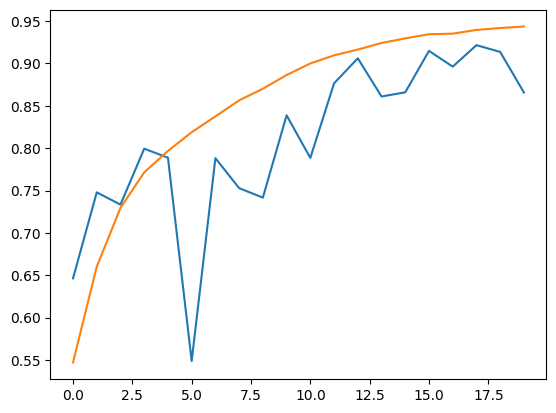

In [13]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

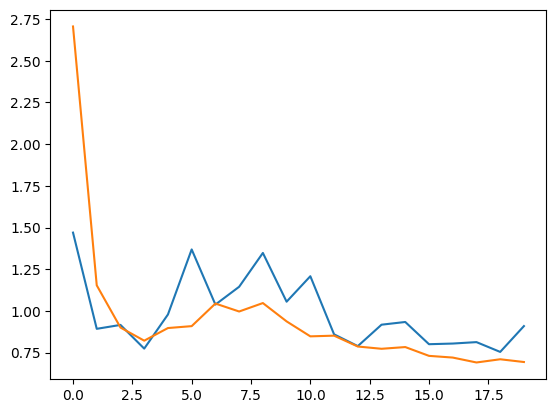

In [14]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

### Prediction

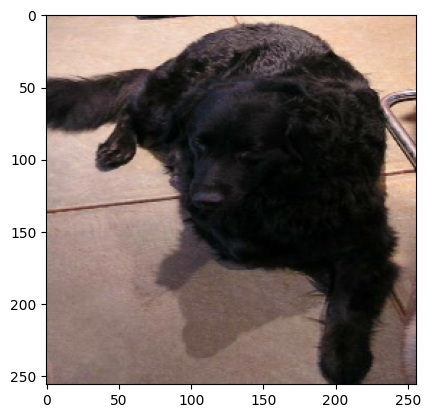

In [88]:
# random image from test data
for image, label in test_ds.take(1):
  image = image[0].numpy()
  label = label[0].numpy()
  plt.imshow(image)

In [89]:
image = image.reshape(1,256,256,3)

In [90]:
label

np.float32(1.0)

In [95]:
pred = model.predict(image)
pred_label = 'Cat' if pred[0][0] <=0.5 else 'Dog'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [97]:
pred_label

'Dog'

In [94]:
dog_prob = pred[0][0]
cat_prob = 1 - dog_prob

pred_label = f"Cat: {cat_prob*100:.2f}%, Dog: {dog_prob*100:.2f}%"
print(pred_label)

Cat: 20.70%, Dog: 79.30%


(112, 162, 3)


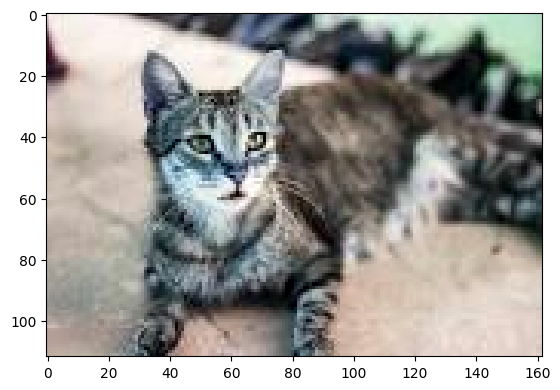

In [100]:
# new unseen image
import cv2
test_image = cv2.imread('/content/cat_image_for_prediction.jfif')
plt.imshow(test_image)
print(test_image.shape)

In [101]:
test_image = cv2.resize(test_image, (256, 256))

In [102]:
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

In [103]:
test_image = test_image/255.0

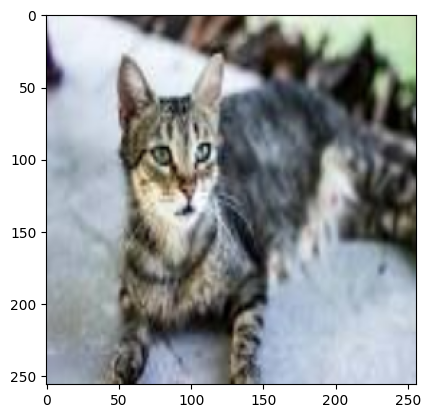

In [104]:
plt.imshow(test_image)     # after converting into RGB

In [105]:
test_image = test_image.reshape(1,256,256,3)

In [106]:
pred1 = model.predict(test_image)
pred_label_1 = 'Cat' if pred1[0][0] < 0.5 else 'Dog'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


In [107]:
pred_label_1

'Cat'

In [108]:
dog_prob = pred1[0][0]
cat_prob = 1 - dog_prob

pred_label = f"Cat: {cat_prob*100:.2f}%, Dog: {dog_prob*100:.2f}%"
print(pred_label)

Cat: 99.71%, Dog: 0.29%


In [65]:
model.save('model.keras')